Importing the Required Libraries 

In [3]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("Instagram data.csv",encoding = "ISO-8859-1")
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


Q.1: Show column names and have a look at their info.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Q.2: Show the descriptive statistics of the data.

In [19]:
#showing the descriptive of data and the transpose of it.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.991597,4843.780105,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.789916,1489.386348,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.512605,1884.361443,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.100840,2613.026132,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.092437,289.431031,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.310924,156.317731,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.663866,3.544576,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.361345,10.089205,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.781513,82.378947,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.621849,87.088402,4.0,15.0,23.0,42.0,611.0


Q.3: Check if your data contains any missing values

In [21]:
#To check for missing values in a dataset, we use the isna() method in pandas DataFrame. This method returns a DataFrame of the same shape as the original one, where each element is True if it's a missing value and False otherwise. Then we can use the sum() method to count the number of missing values in each column.
data.isna()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,False,False,False,False,False,False,False,False,False,False,False,False,False
115,False,False,False,False,False,False,False,False,False,False,False,False,False
116,False,False,False,False,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
data.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Q.4: When you start exploring your data, always start by exploring the main feature of your data. For
example, as we are working on a dataset based on Instagram Reach, we should start by exploring the
feature that contains data about reach. In our data, the Impressions column contains the data about the
reach of an Instagram post. So let’s have a look at the distribution of the Impressions:

In [45]:
#Plot a histogram to visualize the distribution of Impressions across Instagram posts.
#binns describe  the number of bins used to group the data for the histogram. In this case, nbins=9 indicates that the Impressions data will be divided into nine bins
px.histogram(data,x='Impressions',nbins=9)

Q.5: Have a look at the number of impressions on each post over time as shown below


In [25]:
fig = px.line(data, y='Impressions', title='Number of Impressions Over Time')
fig.show()

Q.6: Have a look at all the metrics like Likes, Saves, and Follows from each post over time as given


In [26]:
fig = px.line(data, y=['Likes', 'Saves', 'Follows'], title='Matrics Over Time')
fig.show()

Q.7: Have a look at the distribution of reach from different sources as shown below


In [27]:
cols_sources = data.columns[1:5]
cols_sources[0]

'From Home'

In [28]:
Values = []
for i in cols_sources:
  sum = data[i].sum()
  Values.append(sum)
Values

[294619, 224614, 128294, 20360]

In [29]:
fig = px.pie(
    values=Values,
    names=['From Home','From Hashtags','From Explore','From Other'],
    title="Reach from different Sources"
)
fig.show()

Q.8: Have a look at the distribution of engagement sources as shown below

In [30]:
cols_engag = data.columns[5:9]
cols_engag

Index(['Saves', 'Comments', 'Shares', 'Likes'], dtype='object')

In [31]:
engag_values=[]
for i in cols_engag:
  engag_values.append(data[i].sum())
engag_values


[18244, 793, 1114, 20680]

In [32]:
fig = px.pie(
    values=engag_values,
    names=['Saves','Comments','Shares','Likes'],
   title="Engagment Sources"
)
fig.show()

Q.9: Have a look at the relationship between the number of profile visits and follows as shown below


In [39]:
fig = px.scatter(data,x='Profile Visits',y='Follows',trendline="ols",title = "Follows 'Vs' Profile visits")
fig.show()

Q.10: Have a look at the type of hashtags used in the posts using a wordcloud as shown below

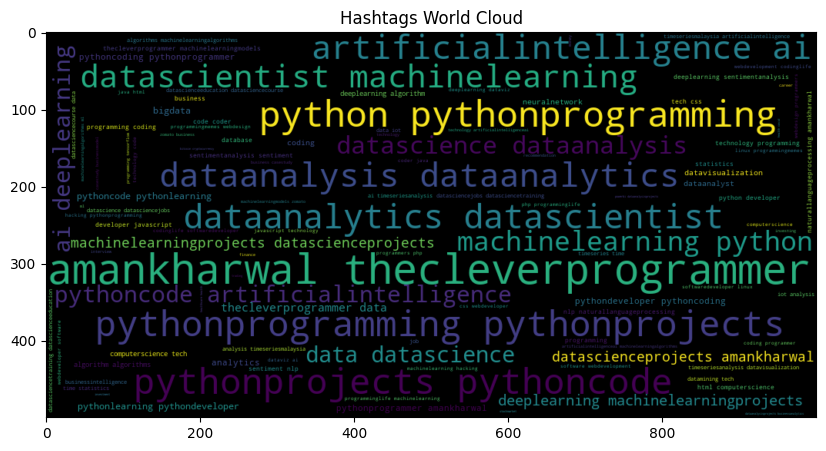

In [38]:

# Create a list of hashtags
hashtags = data['Hashtags']

# Join the hashtags into a single string
text = ' '.join(hashtags)

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=110).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Hashtags World Cloud")
plt.axis()
plt.show()

   Q.11: Have a look at the correlation between all the features as shown below


In [46]:

numeric_data = data.select_dtypes(include=['number'])

# Generate correlation matrix
correlation_matrix = numeric_data.corr()

# Create a DataFrame from the correlation matrix
df = pd.DataFrame(correlation_matrix, columns=correlation_matrix.columns, index=correlation_matrix.index)

# Create a heatmap using px
fig = px.imshow(df, color_continuous_scale='Blues')

# Set the aspect ratio of the cells to be equal
fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=0, b=0),
    height=len(df) * 90,
    width=len(df.columns) * 80,
    xaxis=dict(side='top', title='Features', tickangle=45),  # Set x-axis title and angle
    yaxis=dict(side='left', title='Features'),  # Set y-axis title
    title='Correlation Matrix'  # Set plot title
)

# Set the tick labels
fig.update_xaxes(tickvals=list(range(len(df.columns))), ticktext=df.columns)
fig.update_yaxes(tickvals=list(range(len(df))), ticktext=df.index)

# Show the plot
fig.show()


TypeError: imshow() got an unexpected keyword argument 'annot'

Qno.12 Have a look at the distribution of hashtags to see which hashtag is used the most in all the
posts as shown below

In [41]:
 # Split the hashtags into separate rows
hashtags = data['Hashtags'].str.split(expand=True).stack()

# Count the occurrences of each hashtag
hashtag_counts = hashtags.value_counts()

# Convert the counts to a DataFrame
hashtag_counts_df = pd.DataFrame({'Hashtag': hashtag_counts.index, 'Count': hashtag_counts.values})

# Create a bar plot
fig = px.bar(hashtag_counts_df, x='Hashtag', y='Count', title="Distribution of Hashtags")

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Hashtags",
    yaxis_title="Count",
)

# Show the plot
fig.show()


Q.13: Have a look at the distribution of likes and impressions received from the presence of each
hashtag on the post as shown below

In [42]:
# Split the hashtags into separate rows
hashtags = data['Hashtags'].str.split(expand=True).stack()

# Reset the index to match the length of the hashtag series
hashtags.index = hashtags.index.droplevel(-1)

# Combine the hashtag data with the 'Likes' column
likes_by_hashtag = pd.concat([hashtags, data['Likes']], axis=1)
likes_by_hashtag.columns = ['Hashtag', 'Likes']

# Group the data by hashtag and calculate the total likes received for each hashtag
likes_distribution = likes_by_hashtag.groupby('Hashtag')['Likes'].sum().reset_index()

# Sort the data by likes
likes_distribution = likes_distribution.sort_values(by='Likes', ascending=False)

# Create a bar plot
fig = px.bar(likes_distribution, x='Hashtag', y='Likes', title="Distribution of Likes by Hashtag")

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Hashtags",
    yaxis_title="Total Likes",
    xaxis={'categoryorder':'total descending'} # Order the x-axis by total likes
)

# Show the plot
fig.show()


imprassion Distribution 

In [44]:
# Split the hashtags into separate rows
hashtags = data['Hashtags'].str.split(expand=True).stack()

# Reset the index to match the length of the hashtag series
hashtags.index = hashtags.index.droplevel(-1)

# Combine the hashtag data with the 'Likes' column
Impressions_by_hashtag = pd.concat([hashtags, data['Impressions']], axis=1)
Impressions_by_hashtag.columns = ['Hashtag', 'Impressions']

# Group the data by hashtag and calculate the total likes received for each hashtag
Impressions_distribution = Impressions_by_hashtag.groupby('Hashtag')['Impressions'].sum().reset_index()

# Sort the data by likes
Impressions_distribution = Impressions_distribution.sort_values(by='Impressions', ascending=False)

# Create a bar plot
fig = px.bar(Impressions_distribution, x='Hashtag', y='Impressions', title="Distribution of Impressions by Hashtag")

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Hashtags",
    yaxis_title="Total Impressions",
    xaxis={'categoryorder':'total descending'} # Order the x-axis by total likes
)

# Show the plot
fig.show()

Observation

All columns are identified with their respective data types, and there are no missing values in the dataset.
Descriptive statistics offer insights into the spread and central tendency of numerical variables.
Impressions distribution helps understand the reach variability across Instagram posts.
Analysis of impressions over time reveals trends in audience engagement.
Examining metrics over time tracks changes in likes, saves, and follows.
Understanding the distribution of reach from different sources identifies effective channels.
Distribution of engagement sources highlights significant forms of audience interaction.
Relationship between profile visits and follows indicates conversion rates.
Hashtag word cloud visually represents frequency of hashtag usage.
Correlation analysis reveals relationships between different variables.
Distribution of hashtags identifies popular themes or topics.
Analysis of likes and impressions by hashtag gauges hashtag effectiveness